In [105]:
import random
ran_list = ['x0','x1','x2','y0','y1','y2','z0','z1','z2']
ran = []
for i in range(10):
    ran.append(random.choice(ran_list))
print(ran)

['x1', 'z1', 'y1', 'z1', 'x0', 'x2', 'x0', 'x0', 'y0', 'y0']


rotate X0.. 
pppp [[5 5 5]
 [5 5 5]
 [5 5 5]]
afterrrr [[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
rotate X0.. 
pppp [[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
afterrrr [[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
reset..
random..
reset..
random..
rotate X0.. 
pppp [[5 5 3]
 [3 4 4]
 [2 3 4]]
afterrrr [[2. 3. 5.]
 [3. 4. 5.]
 [4. 4. 3.]]
rotate X0.. 
pppp [[2. 3. 5.]
 [3. 4. 5.]
 [4. 4. 3.]]
afterrrr [[4. 3. 2.]
 [4. 4. 3.]
 [3. 5. 5.]]
rotate X0.. 
pppp [[4. 3. 2.]
 [4. 4. 3.]
 [3. 5. 5.]]
afterrrr [[3. 4. 4.]
 [5. 4. 3.]
 [5. 3. 2.]]
rotate X0.. 
pppp [[3. 4. 4.]
 [5. 4. 3.]
 [5. 3. 2.]]
afterrrr [[5. 5. 3.]
 [3. 4. 4.]
 [2. 3. 4.]]
rotate X0.. 
pppp [[5. 5. 3.]
 [3. 4. 4.]
 [2. 3. 4.]]
afterrrr [[2. 3. 5.]
 [3. 4. 5.]
 [4. 4. 3.]]
rotate X0.. 
pppp [[2. 3. 5.]
 [3. 4. 5.]
 [4. 4. 3.]]
afterrrr [[4. 3. 2.]
 [4. 4. 3.]
 [3. 5. 5.]]
rotate X0.. 
pppp [[4. 3. 2.]
 [4. 4. 3.]
 [3. 5. 5.]]
afterrrr [[3. 4. 4.]
 [5. 4. 3.]
 [5. 3. 2.]]
rotate X0.. 
pppp [[3. 4. 4.]
 [5. 4. 3.]
 [5. 3. 2.]]
afterrrr [[5. 5. 3.]

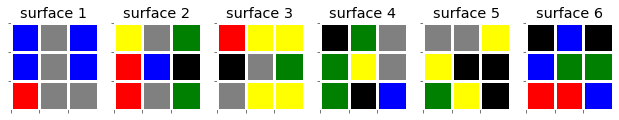

In [112]:
#ui and logic ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random

plt.style.use('ggplot')

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        print('pppp',surface['5'])
        surface['5'] = counter_clockwise(surface['5'],n)
        print('afterrrr',surface['5'])

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = clockwise(surface['6'],n)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = clockwise(surface['4'],n)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['4'] = counter_clockwise(surface['2'],n)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = b
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = b
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = b
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = counter_clockwise(surface['3'],n)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()

def BX0():
    global current_surface
    print('rotate X0.. ')
    data = rotate(current_surface,'x0',3)
    updateUi_surface(data)

def BX1():
    global current_surface
    print('rotate X1..')
    current_surface = rotate(current_surface,'x1',3)
    updateUi_surface(current_surface)
       
def BX2():
    global current_surface
    print('rotate X2..')
    current_surface = rotate(current_surface,'x2',3)
    updateUi_surface(current_surface)
     
def BY0():
    global current_surface
    print('rotate Y0..')
    current_surface = rotate(current_surface,'y0',3)
    updateUi_surface(current_surface)
     
def BY1():
    global current_surface
    print('rotate Y1..')
    current_surface = rotate(current_surface,'y1',3)
    updateUi_surface(current_surface)
    
def BY2():
    global current_surface
    print('rotate Y2..')
    current_surface = rotate(current_surface,'y2',3)
    updateUi_surface(current_surface)
    
def BZ0():
    global current_surface
    print('rotate Z0..')
    current_surface = rotate(current_surface,'z0',3)
    updateUi_surface(current_surface)
    
def BZ1():
    global current_surface
    print('rotate Z1..')
    current_surface = rotate(current_surface,'z1',3)
    updateUi_surface(current_surface)
    
def BZ2():
    global current_surface
    print('rotate Z2..')
    current_surface = rotate(current_surface,'z2',3)
    updateUi_surface(current_surface)
    
def BRST():
    global current_surface
    print('reset..')
    current_surface = {
        '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
        '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
        '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
        '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
        '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
        '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
    }
    updateUi_surface(current_surface)
    
def RANDOM():
    global current_surface
    print('random..')
#     data = {
#         '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
#         '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
#         '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
#         '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
#         '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
#         '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
#     }

    
    ran_list = ['x0','x1','x2','y0','y1','y2','z0','z1','z2']
    ran = []
    for i in range(10):
        ran.append(random.choice(ran_list))
    for i in ran:
        data = rotate(current_surface,i,3)
        
    current_surface = data
    updateUi_surface(current_surface)
    


#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubrick")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)

#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.10
BX0 = tk.Button(left_frame,text="X0",command = BX0)
BX0.place(relheight=RH, relwidth=1)
BX1 = tk.Button(left_frame,text="X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BX2 = tk.Button(left_frame,text="X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY0 = tk.Button(left_frame,text="Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY1 = tk.Button(left_frame,text="Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY2 = tk.Button(left_frame,text="Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ0 = tk.Button(left_frame,text="Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ1 = tk.Button(left_frame,text="Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ2 = tk.Button(left_frame,text="Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BRST = tk.Button(left_frame,text="Reset",command = BRST)
BRST.place(rely= 9*(0.1 + RH*0.01) ,relheight=RH, relwidth=0.5)
RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01), relx=0.5,relheight=RH, relwidth=0.5)

#----------------------------------------------------------------------------------------------------
#start

current_surface = {
    '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
}

updateUi_surface(current_surface)




root.mainloop()

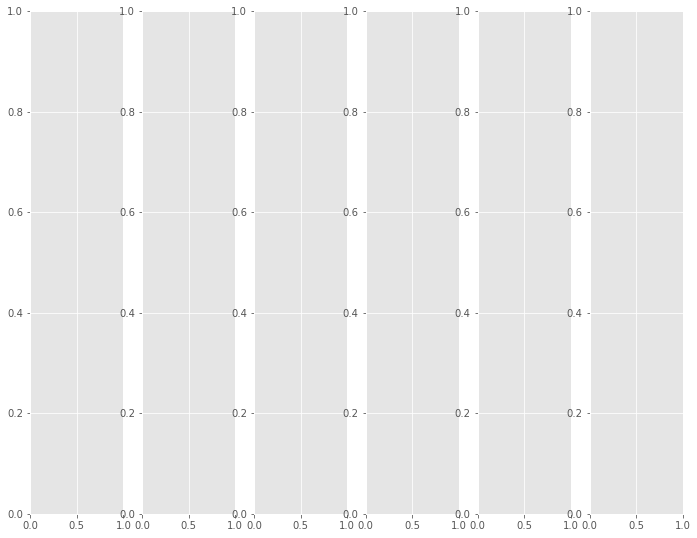

In [63]:
#ui ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors

def update(data):
       
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

#     ax[1].clf()
    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

#     ax[2].clf()
    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

#     ax[3].clf()
    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

#     ax[4].clf()
    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

#     ax[5].clf()
    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
    
    
    
    line.draw()

def B0f():
    print('btn1111111111111')
    
    update(data1)
#     x = np.linspace(0,2*np.pi,100)
#     y = np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=sin(4x)$')
#     line.draw()
    
def B1f():
    print('btn22222')
    
    update(data)
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.cos(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=cos(4x)$')
#     line.draw()
    
def B2f():
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    figure, ax = plt.subplots(1, 6,figsize=(20,20))
    line = FigureCanvasTkAgg(figure, right_frame)
    line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
    x = np.linspace(0, 8, 1000)
    
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)

#     line.clear()
    
    
#     ax.clear()
    
#     line.get_tk_widget().pack_forget()
    
#     ax[0].clf()
#     ax[1].clf()
#     ax[2].clf()
#     ax[3].clf()
#     ax[4].clf()
#     ax[5].clf()
#     line.draw()
    line.draw()
    figure.clf()
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.exp(-0.5*x)*np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=e^{-0.5x}sin(4x)$')
#     line.draw()

def B3f():
    x = np.linspace(0,10,100)
    y = np.exp(x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = e^{x}$')
    line.draw()
    
def B4f():
    def gaussian(x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    x = np.linspace(0,10,100)
    y = gaussian(x,5,1.3)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = Gaussian(x,5,1.3)$')
    line.draw()

#--- Raiz ---
root = tk.Tk()
root.geometry('940x450')
root.title("Tkinter + Matplotlib")
#------------

#-- Frames ---
left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)
#---------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# # ax = figure.add_subplot(111)
# # ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------
# cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
# bounds = [0,1,2,3,4,5,6]
# norm = colors.BoundaryNorm(bounds, cmap.N)

figure, ax = plt.subplots(1, 6,figsize=(20,20))
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#--- Botones ---
RH = 0.19

B0 = tk.Button(left_frame,text="SIN(4x)",command = B0f)
B0.place(relheight=RH, relwidth=1)

B1 = tk.Button(left_frame,text="COS(4x)",command = B1f)
B1.place(rely=(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B2 = tk.Button(left_frame,text="EXP(-0.5x)SIN(x)",command = B2f)
B2.place(rely= 2*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B3 = tk.Button(left_frame,text="EXP(x)",command = B3f)
B3.place(rely= 3*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B4 = tk.Button(left_frame,text="Gaussian(x)",command = B4f)
B4.place(rely= 4*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)
#------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------

data = {'1': np.array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': np.array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': np.array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': np.array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': np.array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}

data1 = {'1': np.array([[4, 1, 1],
       [0, 0, 0],
       [0, 0, 0]]), '2': np.array([[2, 2, 2],
       [0, 0, 0],
       [0, 0, 0]]), '3': np.array([[3, 3, 3],
       [0, 0, 0],
       [0, 0, 0]]), '4': np.array([[4, 4, 4],
       [0, 0, 0],
       [0, 0, 0]]), '5': np.array([[5, 5, 5],
       [0, 0, 0],
       [0, 0, 0]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}



# update(data)



root.mainloop()

In [ ]:
#logic ok 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 6,figsize=(20,20))
    x = np.linspace(0, 8, 1000)

    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')

    fig.show()
    
def show_surface2line(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(2, 6,figsize=(12,7))
    x = np.linspace(0, 8, 1000)

    ax[0, 0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].axes.xaxis.set_ticklabels([])
    ax[0, 0].axes.yaxis.set_ticklabels([])
    ax[0, 0].set_title('surface 1')

    ax[0, 1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].axes.xaxis.set_ticklabels([])
    ax[0, 1].axes.yaxis.set_ticklabels([])
    ax[0, 1].set_title('surface 2')

    ax[0, 2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].axes.xaxis.set_ticklabels([])
    ax[0, 2].axes.yaxis.set_ticklabels([])
    ax[0, 2].set_title('surface 3')

    ax[1, 0].imshow(data['4'], cmap=cmap, norm=norm)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].axes.xaxis.set_ticklabels([])
    ax[1, 0].axes.yaxis.set_ticklabels([])
    ax[1, 0].set_title('surface 4')

    ax[1, 1].imshow(data['5'], cmap=cmap, norm=norm)
    ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].axes.xaxis.set_ticklabels([])
    ax[1, 1].axes.yaxis.set_ticklabels([])
    ax[1, 1].set_title('surface 5')

    ax[1, 2].imshow(data['6'], cmap=cmap, norm=norm)
    ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].axes.xaxis.set_ticklabels([])
    ax[1, 2].axes.yaxis.set_ticklabels([])
    ax[1, 2].set_title('surface 6')

    fig.show()

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        surface['5'] = counter_clockwise(surface['5'],n)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = clockwise(surface['6'],n)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = clockwise(surface['4'],n)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['4'] = counter_clockwise(surface['2'],n)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = b
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = b
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = b
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = counter_clockwise(surface['3'],n)
        
    return surface
    

surface = {
    '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
}




# show_surface(surface)
x = rotate(surface,'x1',1)
print(x)
# show_surface(x)
# x = rotate(surface,'x1',1)
# show_surface(x)



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 6,figsize=(20,20))
    x = np.linspace(0, 8, 1000)

    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')

    fig.show()
    
def show_surface2line(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(2, 6,figsize=(12,7))
    x = np.linspace(0, 8, 1000)

    ax[0, 0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].axes.xaxis.set_ticklabels([])
    ax[0, 0].axes.yaxis.set_ticklabels([])
    ax[0, 0].set_title('surface 1')

    ax[0, 1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].axes.xaxis.set_ticklabels([])
    ax[0, 1].axes.yaxis.set_ticklabels([])
    ax[0, 1].set_title('surface 2')

    ax[0, 2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].axes.xaxis.set_ticklabels([])
    ax[0, 2].axes.yaxis.set_ticklabels([])
    ax[0, 2].set_title('surface 3')

    ax[1, 0].imshow(data['4'], cmap=cmap, norm=norm)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].axes.xaxis.set_ticklabels([])
    ax[1, 0].axes.yaxis.set_ticklabels([])
    ax[1, 0].set_title('surface 4')

    ax[1, 1].imshow(data['5'], cmap=cmap, norm=norm)
    ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].axes.xaxis.set_ticklabels([])
    ax[1, 1].axes.yaxis.set_ticklabels([])
    ax[1, 1].set_title('surface 5')

    ax[1, 2].imshow(data['6'], cmap=cmap, norm=norm)
    ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].axes.xaxis.set_ticklabels([])
    ax[1, 2].axes.yaxis.set_ticklabels([])
    ax[1, 2].set_title('surface 6')

    fig.show()

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        surface['5'] = counter_clockwise(surface['5'],n)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = clockwise(surface['6'],n)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = clockwise(surface['4'],n)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['4'] = counter_clockwise(surface['2'],n)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = b
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = b
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = b
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = counter_clockwise(surface['3'],n)
        
    return surface
    

surface = {
    '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
}




# show_surface(surface)
x = rotate(surface,'x1',1)
print(x)
# show_surface(x)
# x = rotate(surface,'x1',1)
# show_surface(x)



{'1': array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}


button click..
xxxxxxxxxx


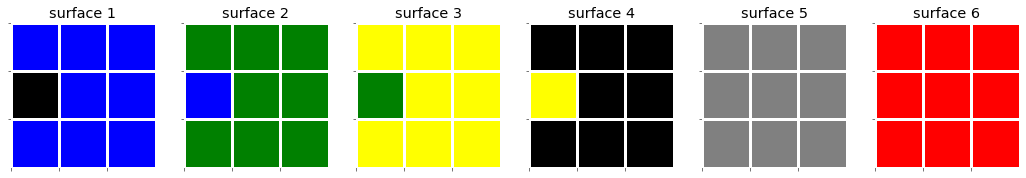

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
 
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 800, height = 300)
canvas1.pack()

label1 = tk.Label(root, text='Graphical User Interface')
label1.config(font=('Arial', 20))
canvas1.create_window(400, 50, window=label1)
   
entry1 = tk.Entry (root)
canvas1.create_window(400, 100, window=entry1) 

def btn_click(data):
    print('button click..')
    show_surface(data)
  
    
def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 6,figsize=(20,20))
    x = np.linspace(0, 8, 1000)

    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
    
    bar1 = FigureCanvasTkAgg(fig, root) 
    bar1.get_tk_widget().pack()
    
    print('xxxxxxxxxx')
    
#     fig.show()
    
x = {'1': np.array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': np.array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': np.array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': np.array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': np.array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}

# show_surface(x)

button1 = tk.Button (root, text=' Create Charts ',command=btn_click(x), bg='palegreen2', font=('Arial', 11, 'bold')) 
canvas1.create_window(400, 180, window=button1)





root.mainloop()

In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 13 15:08:30 2019
@author: Rodolfo E. Escobar U.
"""
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def B0f():
    x = np.linspace(0,2*np.pi,100)
    y = np.sin(4*x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
    ax.set_title('$y(x)=sin(4x)$')
    line.draw()
    
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 6,figsize=(20,20))
    x = np.linspace(0, 8, 1000)

    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')
    
def B1f():
    x = np.linspace(0,2*np.pi,100)
    y = np.cos(4*x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
    ax.set_title('$y(x)=cos(4x)$')
    line.draw()
    
def B2f():
    x = np.linspace(0,2*np.pi,100)
    y = np.exp(-0.5*x)*np.sin(4*x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
    ax.set_title('$y(x)=e^{-0.5x}sin(4x)$')
    line.draw()

def B3f():
    x = np.linspace(0,10,100)
    y = np.exp(x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = e^{x}$')
    line.draw()
    
def B4f():
    def gaussian(x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    x = np.linspace(0,10,100)
    y = gaussian(x,5,1.3)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = Gaussian(x,5,1.3)$')
    line.draw()

#--- Raiz ---
root = tk.Tk()
root.geometry('940x450')
root.title("Tkinter + Matplotlib")
#------------

#-- Frames ---
left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)
#---------------

#--- Botones ---
RH = 0.19

B0 = tk.Button(left_frame,text="SIN(4x)",command = B0f)
B0.place(relheight=RH, relwidth=1)

B1 = tk.Button(left_frame,text="COS(4x)",command = B1f)
B1.place(rely=(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B2 = tk.Button(left_frame,text="EXP(-0.5x)SIN(x)",command = B2f)
B2.place(rely= 2*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B3 = tk.Button(left_frame,text="EXP(x)",command = B3f)
B3.place(rely= 3*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B4 = tk.Button(left_frame,text="Gaussian(x)",command = B4f)
B4.place(rely= 4*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)
#------------

#--- Agregar figura ---
figure = plt.Figure(figsize=(5,6), dpi=100)
ax = figure.add_subplot(111)
ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------

root.mainloop()

btn1111111111111
btn22222
btn1111111111111
btn22222
btn1111111111111
btn22222
btn22222
btn1111111111111
btn22222


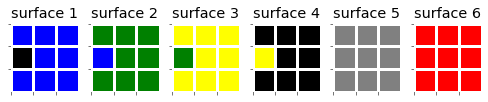

<Figure size 607x401 with 0 Axes>

In [38]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors

def update(data):
       
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

#     ax[1].clf()
    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

#     ax[2].clf()
    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

#     ax[3].clf()
    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

#     ax[4].clf()
    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

#     ax[5].clf()
    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
    
    
    
    line.draw()

def B0f():
    print('btn1111111111111')
    
    update(data1)
#     x = np.linspace(0,2*np.pi,100)
#     y = np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=sin(4x)$')
#     line.draw()
    
def B1f():
    print('btn22222')
    
    update(data)
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.cos(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=cos(4x)$')
#     line.draw()
    
def B2f():
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    figure, ax = plt.subplots(1, 6,figsize=(20,20))
    line = FigureCanvasTkAgg(figure, right_frame)
    line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
    x = np.linspace(0, 8, 1000)
    
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)

#     line.clear()
    
    
#     ax.clear()
    
#     line.get_tk_widget().pack_forget()
    
#     ax[0].clf()
#     ax[1].clf()
#     ax[2].clf()
#     ax[3].clf()
#     ax[4].clf()
#     ax[5].clf()
#     line.draw()
    line.draw()
    figure.clf()
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.exp(-0.5*x)*np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=e^{-0.5x}sin(4x)$')
#     line.draw()

def B3f():
    x = np.linspace(0,10,100)
    y = np.exp(x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = e^{x}$')
    line.draw()
    
def B4f():
    def gaussian(x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    x = np.linspace(0,10,100)
    y = gaussian(x,5,1.3)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = Gaussian(x,5,1.3)$')
    line.draw()

#--- Raiz ---
root = tk.Tk()
root.geometry('940x450')
root.title("Tkinter + Matplotlib")
#------------

#-- Frames ---
left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)
#---------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# # ax = figure.add_subplot(111)
# # ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------
# cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
# bounds = [0,1,2,3,4,5,6]
# norm = colors.BoundaryNorm(bounds, cmap.N)

figure, ax = plt.subplots(1, 6,figsize=(20,20))
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#--- Botones ---
RH = 0.19

B0 = tk.Button(left_frame,text="SIN(4x)",command = B0f)
B0.place(relheight=RH, relwidth=1)

B1 = tk.Button(left_frame,text="COS(4x)",command = B1f)
B1.place(rely=(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B2 = tk.Button(left_frame,text="EXP(-0.5x)SIN(x)",command = B2f)
B2.place(rely= 2*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B3 = tk.Button(left_frame,text="EXP(x)",command = B3f)
B3.place(rely= 3*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B4 = tk.Button(left_frame,text="Gaussian(x)",command = B4f)
B4.place(rely= 4*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)
#------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------

data = {'1': np.array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': np.array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': np.array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': np.array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': np.array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}

data1 = {'1': np.array([[4, 1, 1],
       [0, 0, 0],
       [0, 0, 0]]), '2': np.array([[2, 2, 2],
       [0, 0, 0],
       [0, 0, 0]]), '3': np.array([[3, 3, 3],
       [0, 0, 0],
       [0, 0, 0]]), '4': np.array([[4, 4, 4],
       [0, 0, 0],
       [0, 0, 0]]), '5': np.array([[5, 5, 5],
       [0, 0, 0],
       [0, 0, 0]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}



# update(data)



root.mainloop()

In [20]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
 
root= tk.Tk()
  
canvas1 = tk.Canvas(root, width = 800, height = 300)
canvas1.pack()

label1 = tk.Label(root, text='Graphical User Interface')
label1.config(font=('Arial', 20))
canvas1.create_window(400, 50, window=label1)
   
entry1 = tk.Entry (root)
canvas1.create_window(400, 100, window=entry1) 
  
entry2 = tk.Entry (root)
canvas1.create_window(400, 120, window=entry2) 
          
entry3 = tk.Entry (root)
canvas1.create_window(400, 140, window=entry3) 
  
def create_charts():
    global x1
    global x2
    global x3
    global bar1
    global pie2
    x1 = float(entry1.get())
    x2 = float(entry2.get())
    x3 = float(entry3.get())

    figure1 = Figure(figsize=(4,3), dpi=100) 
    subplot1 = figure1.add_subplot(111) 
    xAxis = [float(x1),float(x2),float(x3)] 
    yAxis = [float(x1),float(x2),float(x3)] 
    subplot1.bar(xAxis,yAxis, color = 'lightsteelblue') 
    bar1 = FigureCanvasTkAgg(figure1, root) 
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=0)
      
    figure2 = Figure(figsize=(4,3), dpi=100) 
    subplot2 = figure2.add_subplot(111) 
    labels2 = 'Label1', 'Label2', 'Label3' 
    pieSizes = [float(x1),float(x2),float(x3)]
    my_colors2 = ['lightblue','lightsteelblue','silver']
    explode2 = (0, 0.1, 0)  
    subplot2.pie(pieSizes, colors=my_colors2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90) 
    subplot2.axis('equal')  
    pie2 = FigureCanvasTkAgg(figure2, root)
    pie2.get_tk_widget().pack()

def clear_charts():
    bar1.get_tk_widget().pack_forget()
    pie2.get_tk_widget().pack_forget()
            
button1 = tk.Button (root, text=' Create Charts ',command=create_charts, bg='palegreen2', font=('Arial', 11, 'bold')) 
canvas1.create_window(400, 180, window=button1)

button2 = tk.Button (root, text='  Clear Charts  ', command=clear_charts, bg='lightskyblue2', font=('Arial', 11, 'bold'))
canvas1.create_window(400, 220, window=button2)

button3 = tk.Button (root, text='Exit Application', command=root.destroy, bg='lightsteelblue2', font=('Arial', 11, 'bold'))
canvas1.create_window(400, 260, window=button3)
 
root.mainloop()

In [ ]:
{'1': array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}

In [3]:
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

data1 = {'Country': ['US','CA','GER','UK','FR'],
         'GDP_Per_Capita': [45000,42000,52000,49000,47000]
        }
df1 = DataFrame(data1,columns=['Country','GDP_Per_Capita'])


data2 = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
         'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
        }
df2 = DataFrame(data2,columns=['Year','Unemployment_Rate'])


data3 = {'Interest_Rate': [5,5.5,6,5.5,5.25,6.5,7,8,7.5,8.5],
         'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
        }  
df3 = DataFrame(data3,columns=['Interest_Rate','Stock_Index_Price'])
 

root= tk.Tk() 
  
figure1 = plt.Figure(figsize=(6,5), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df1 = df1[['Country','GDP_Per_Capita']].groupby('Country').sum()
df1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('Country Vs. GDP Per Capita')

figure2 = plt.Figure(figsize=(5,4), dpi=100)
ax2 = figure2.add_subplot(111)
line2 = FigureCanvasTkAgg(figure2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df2 = df2[['Year','Unemployment_Rate']].groupby('Year').sum()
df2.plot(kind='line', legend=True, ax=ax2, color='r',marker='o', fontsize=10)
ax2.set_title('Year Vs. Unemployment Rate')

figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df3['Interest_Rate'],df3['Stock_Index_Price'], color = 'g')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend(['Stock_Index_Price']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

root.mainloop()

In [ ]:
from tkinter import *   
  
top = Tk()  
  
top.geometry("200x100")  
  
def fun():  
    messagebox.showinfo("Hello", "Red Button clicked")  
  
  
b1 = Button(top,text = "Red",command = fun,activeforeground = "red",activebackground = "pink",pady=10)  
  
b2 = Button(top, text = "Blue",activeforeground = "blue",activebackground = "pink",pady=10)  
  
b3 = Button(top, text = "Green",activeforeground = "green",activebackground = "pink",pady = 10)  
  
b4 = Button(top, text = "Yellow",activeforeground = "yellow",activebackground = "pink",pady = 10)  
  
b1.pack(side = LEFT)  
  
b2.pack(side = RIGHT)  
  
b3.pack(side = TOP)  
  
b4.pack(side = BOTTOM)  
  
top.mainloop()  

In [2]:
import tkinter as tk

root = tk.Tk()

chLabel = tk.Label(root, text="Channel group")
channelButtons = tk.Frame(root, bg='yellow')
ch1Button = tk.Button(channelButtons, text="CH1 Settings")
ch1Button.pack(fill='x')
ch2Button = tk.Button(channelButtons, text="CH2 Settings")
ch2Button.pack(fill='x')
ch3Button = tk.Button(channelButtons, text="CH3 Settings")
ch3Button.pack(fill='x')
ch4Button = tk.Button(channelButtons, text="CH4 Settings")
ch4Button.pack(fill='x')

trigLabel = tk.Label(root, text="Trigger group")
trigButton = tk.Button(root, text="Trigger Settings")

horizLabel = tk.Label(root, text="Horizontal group")
horizButton = tk.Button(root, text="Horizontal settings")

# Align the labels and buttons in a 2-by-3 grid
chLabel.grid(row=0, column=0, pady=10)
trigLabel.grid(row=0, column=1, pady=10)
horizLabel.grid(row=0, column=2, pady=10)
channelButtons.grid(row=1, column=0, sticky='news')
trigButton.grid(row=1, column=1, sticky='news')
horizButton.grid(row=1, column=2, sticky='news')

root.mainloop()

In [172]:
x = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)


def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

clockwise(x,2)

array([[9., 8., 7.],
       [6., 5., 4.],
       [3., 2., 1.]])

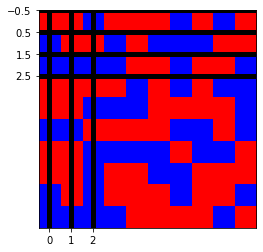

In [297]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=5)
ax.set_xticks(np.arange(0, 3, 1));
ax.set_yticks(np.arange(-.5, 3, 1));

plt.show()

Text(0.5, 1.02, 'surface 6')

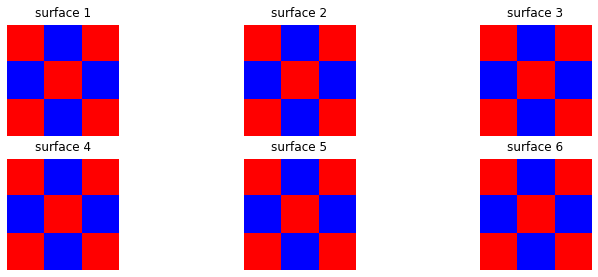

In [111]:
import matplotlib.pyplot as plt
import numpy as np

n = 3
a = np.reshape(np.linspace(0,1,n**2), (n,n))
plt.figure(figsize=(12,4.5))

plt.subplot(231)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 1', y=1.02, fontsize=12)

plt.subplot(232)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 2', y=1.02, fontsize=12)

plt.subplot(233)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 3', y=1.02, fontsize=12)

plt.subplot(234)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 4', y=1.02, fontsize=12)

plt.subplot(235)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 5', y=1.02, fontsize=12)

plt.subplot(236)
plt.axis('off')
plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('surface 6', y=1.02, fontsize=12)

# plt.subplot(231)
# plt.imshow(a,cmap = colors.ListedColormap(['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']))
# plt.xticks(range(n))
# plt.yticks(range(n))
# plt.title('surface 1', y=1.02, fontsize=12)

# #the same array as above, but with different color map
# plt.subplot(132)
# plt.imshow(a, cmap = 'viridis', interpolation='nearest')
# plt.yticks([])
# plt.xticks(range(n))
# plt.title('Viridis color map, no blending', y=1.02, fontsize=12)

# #the same array as above, but with blending
# plt.subplot(133)
# plt.imshow(a, cmap = 'viridis', interpolation='bicubic')
# plt.yticks([])
# plt.xticks(range(n))
# plt.title('Viridis color map, bicubic blending', y=1.02, fontsize=12)

# plt.show()

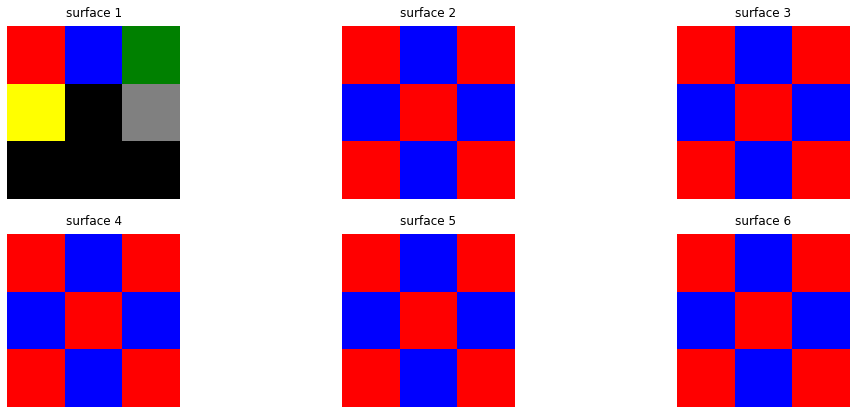

In [394]:
import matplotlib.pyplot as plt
import numpy as np

def show_surface():
    
    csurface = ['','','','','','','','','']
    csurface[1] = ['red', 'blue','green', 'yellow','black', 'gray','black', 'black','black']
    csurface[2] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    csurface[3] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    csurface[4] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    csurface[5] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    csurface[6] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    
    n = 3
    a = np.reshape(np.linspace(0,1,n**2), (n,n))
    plt.figure(figsize=(17,7))

    plt.subplot(231)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[1]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 1', y=1.02, fontsize=12)

    plt.subplot(232)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[2]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 2', y=1.02, fontsize=12)

    plt.subplot(233)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[3]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 3', y=1.02, fontsize=12)

    plt.subplot(234)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[4]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 4', y=1.02, fontsize=12)

    plt.subplot(235)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[5]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 5', y=1.02, fontsize=12)

    plt.subplot(236)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[6]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 6', y=1.02, fontsize=12)
    
show_surface()

In [252]:
a = [1,2,3,4,5,6,3,4,6]

def get_color(a):
    c = {
        1 : 'red',
        2 : 'blue',
        3 : 'green',
        4 : 'yellow',
        5 : 'black',
        6 : 'gray'    
    }
    color_list = []
    for i in a:
        color_list.append(c[i])
    return color_list

get_color(a)
    
# 'red', 'blue','green', 'yellow','black', 'gray','black', 'black','black']

['red', 'blue', 'green', 'yellow', 'black', 'gray', 'green', 'yellow', 'gray']

In [319]:
import matplotlib.pyplot as plt
import numpy as np

def show_surface(csurface):
    
#     csurface = ['','','','','','','','','']
#     csurface[1] = ['red', 'blue','green', 'yellow','black', 'gray','black', 'black','black']
#     csurface[2] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
#     csurface[3] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
#     csurface[4] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
#     csurface[5] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
#     csurface[6] = ['red', 'blue','red', 'blue','red', 'blue','red', 'blue','red']
    
    n = 3
    a = np.reshape(np.linspace(0,1,n**2), (n,n))
    plt.figure(figsize=(17,7))

    plt.subplot(231)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[1]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 1', y=1.02, fontsize=12)

    plt.subplot(232)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[2]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 2', y=1.02, fontsize=12)

    plt.subplot(233)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[3]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 3', y=1.02, fontsize=12)

    plt.subplot(234)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[4]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 4', y=1.02, fontsize=12)

    plt.subplot(235)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[5]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 5', y=1.02, fontsize=12)

    plt.subplot(236)
    plt.axis('off')
    plt.imshow(a,cmap = colors.ListedColormap(csurface[6]))
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('surface 6', y=1.02, fontsize=12)
    
show_surface()

TypeError: show_surface() missing 1 required positional argument: 'csurface'

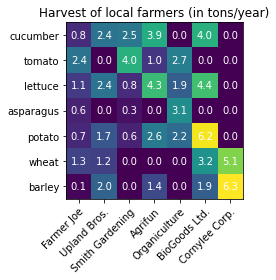

In [336]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()



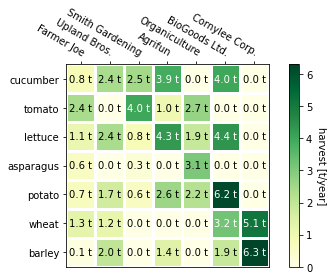

In [344]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
#     ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [393]:
# np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# # Replicate the above example with a different font size and colormap.

# im, _ = heatmap(harvest, vegetables, farmers, ax=ax,
#                 cmap="Wistia", cbarlabel="harvest [t/year]")
# annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# # Create some new data, give further arguments to imshow (vmin),
# # use an integer format on the annotations and provide some colors.

# data = np.random.randint(2, 100, size=(7, 7))
# y = ["Book {}".format(i) for i in range(1, 8)]
# x = ["Store {}".format(i) for i in list("ABCDEFG")]
# im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
#                 cmap="magma_r", cbarlabel="weekly sold copies")
# annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
#                  textcolors=("red", "white"))

# # Sometimes even the data itself is categorical. Here we use a
# # `matplotlib.colors.BoundaryNorm` to get the data into classes
# # and use this to colorize the plot, but also to obtain the class
# # labels from an array of classes.

# data = np.random.randn(3, 3)
data = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
print('data:',data)

# y = ["Prod. {}".format(i) for i in range(1, 4)]
# x = ["Cycle {}".format(i) for i in range(1, 4)]
y = ''
x = ''
# print('x :',x)
# print('y: ',y)

qrates = list("123456")
# print('qrates:',qrates)

norm = matplotlib.colors.BoundaryNorm(np.linspace(0, 10, 7), 6)
# print('np.linspace(-3.5, 3.5, 8), 7:',np.linspace(-3.5, 2.8, 7), 6)
# print(norm)

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=plt.get_cmap(colors.ListedColormap(['red', 'blue','green', 'yellow','black', 'gray'])), norm=norm)

#                 cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
#                 cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=20, fontweight="bold", threshold=-1,
                 textcolors=("red", "white"))

# plt.axis('off')
#     plt.imshow(a,cmap = colors.ListedColormap(csurface[1]))
#     plt.xticks(range(n))
#     plt.yticks(range(n))
#     plt.title('surface 2', y=1.02, fontsize=12)
# # We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# # we use those as vmin and vmax. We may also remove leading zeros and hide
# # the diagonal elements (which are all 1) by using a
# # `matplotlib.ticker.FuncFormatter`.

# corr_matrix = np.corrcoef(harvest)
# im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
#                 cmap="PuOr", vmin=-1, vmax=1,
#                 cbarlabel="correlation coeff.")


# def func(x, pos):
#     return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

# annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)

# plt.axis('off')

plt.tight_layout()
plt.show()

data: [[1 2 3]
 [4 5 6]
 [7 8 9]]


<Figure size 432x288 with 0 Axes>

In [359]:
np.random.randn(3, 3)

array([[ 0.3949208 , -0.24286773,  0.74306369],
       [ 0.02161061,  1.82132095, -1.63794273],
       [ 0.09489429, -0.17335139,  0.55516745]])

In [361]:
np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [373]:
np.linspace(1, 7, 7)

array([1., 2., 3., 4., 5., 6., 7.])

[[1 2 3]
 [4 5 6]
 [1 2 3]]


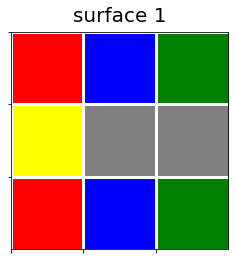

In [426]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# data = np.random.rand(3, 3) * 20
data = np.array([1,2,3,4,5,6,1,2,3]).reshape(3,3)
print(data)

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue','green', 'yellow','black', 'gray'])
bounds = [1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax.set_xticks(np.arange(-.5, 2.5, 1));
ax.set_yticks(np.arange(-.5, 2.5, 1));

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

# plt.axis('off')
plt.title('surface 1', y=1.02, fontsize=20)
plt.show()

# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])

# plt.grid(True)

<ipython-input-107-1879d44e834f>:108: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


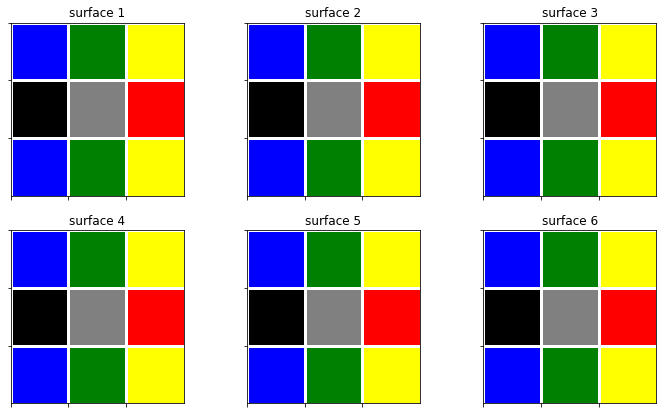

In [107]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import time



# def show_surface(data):
    

data = np.array([1,2,3,4,5,0,1,2,3]).reshape(3,3)
# print(data)
# show_surface(data)
cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
bounds = [0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)

# fig, ax = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
# ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax.set_xticks(np.arange(-.5, 2.5, 1));
# ax.set_yticks(np.arange(-.5, 2.5, 1));
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
# plt.title('surface 1', y=1.02, fontsize=20)
# plt.show()

# fig, ax = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
# ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax.set_xticks(np.arange(-.5, 2.5, 1));
# ax.set_yticks(np.arange(-.5, 2.5, 1));
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
# plt.title('surface 2', y=1.02, fontsize=20)
# plt.show()

# fig, ax = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
# ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax.set_xticks(np.arange(-.5, 2.5, 1));
# ax.set_yticks(np.arange(-.5, 2.5, 1));
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
# plt.title('surface 2', y=1.02, fontsize=20)
# plt.show()


fig, ax = plt.subplots(2, 3,figsize=(12,7))
x = np.linspace(0, 8, 1000)
# ax.imshow(data, cmap=cmap, norm=norm)
# ax.grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)

ax[0, 0].imshow(data, cmap=cmap, norm=norm)
ax[0, 0].imshow(data, cmap=cmap, norm=norm)
ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
ax[0, 0].axes.xaxis.set_ticklabels([])
ax[0, 0].axes.yaxis.set_ticklabels([])
ax[0, 0].set_title('surface 1')

ax[0, 1].imshow(data, cmap=cmap, norm=norm)
ax[0, 1].imshow(data, cmap=cmap, norm=norm)
ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
ax[0, 1].axes.xaxis.set_ticklabels([])
ax[0, 1].axes.yaxis.set_ticklabels([])
ax[0, 1].set_title('surface 2')

ax[0, 2].imshow(data, cmap=cmap, norm=norm)
ax[0, 2].imshow(data, cmap=cmap, norm=norm)
ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
ax[0, 2].axes.xaxis.set_ticklabels([])
ax[0, 2].axes.yaxis.set_ticklabels([])
ax[0, 2].set_title('surface 3')

ax[1, 0].imshow(data, cmap=cmap, norm=norm)
ax[1, 0].imshow(data, cmap=cmap, norm=norm)
ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
ax[1, 0].axes.xaxis.set_ticklabels([])
ax[1, 0].axes.yaxis.set_ticklabels([])
ax[1, 0].set_title('surface 4')

ax[1, 1].imshow(data, cmap=cmap, norm=norm)
ax[1, 1].imshow(data, cmap=cmap, norm=norm)
ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
ax[1, 1].axes.xaxis.set_ticklabels([])
ax[1, 1].axes.yaxis.set_ticklabels([])
ax[1, 1].set_title('surface 5')

ax[1, 2].imshow(data, cmap=cmap, norm=norm)
ax[1, 2].imshow(data, cmap=cmap, norm=norm)
ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
ax[1, 2].axes.xaxis.set_ticklabels([])
ax[1, 2].axes.yaxis.set_ticklabels([])
ax[1, 2].set_title('surface 6')

fig.show()

# data = np.array([5,3,4,3,2,0,1,2,3]).reshape(3,3)

# ax[0, 0].imshow(data, cmap=cmap, norm=norm)
# ax[0, 0].imshow(data, cmap=cmap, norm=norm)
# ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
# ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
# ax[0, 0].axes.xaxis.set_ticklabels([])
# ax[0, 0].axes.yaxis.set_ticklabels([])
# ax[0, 0].set_title('surface 1')

# ax[0, 1].imshow(data, cmap=cmap, norm=norm)
# ax[0, 1].imshow(data, cmap=cmap, norm=norm)
# ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
# ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
# ax[0, 1].axes.xaxis.set_ticklabels([])
# ax[0, 1].axes.yaxis.set_ticklabels([])
# ax[0, 1].set_title('surface 2')

# ax[0, 2].imshow(data, cmap=cmap, norm=norm)
# ax[0, 2].imshow(data, cmap=cmap, norm=norm)
# ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
# ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
# ax[0, 2].axes.xaxis.set_ticklabels([])
# ax[0, 2].axes.yaxis.set_ticklabels([])
# ax[0, 2].set_title('surface 3')

# ax[1, 0].imshow(data, cmap=cmap, norm=norm)
# ax[1, 0].imshow(data, cmap=cmap, norm=norm)
# ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
# ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
# ax[1, 0].axes.xaxis.set_ticklabels([])
# ax[1, 0].axes.yaxis.set_ticklabels([])
# ax[1, 0].set_title('surface 4')

# ax[1, 1].imshow(data, cmap=cmap, norm=norm)
# ax[1, 1].imshow(data, cmap=cmap, norm=norm)
# ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
# ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
# ax[1, 1].axes.xaxis.set_ticklabels([])
# ax[1, 1].axes.yaxis.set_ticklabels([])
# ax[1, 1].set_title('surface 5')

# ax[1, 2].imshow(data, cmap=cmap, norm=norm)
# ax[1, 2].imshow(data, cmap=cmap, norm=norm)
# ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
# ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
# ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
# ax[1, 2].axes.xaxis.set_ticklabels([])
# ax[1, 2].axes.yaxis.set_ticklabels([])
# ax[1, 2].set_title('surface 6')

# fig.show()








<ipython-input-118-65fc65edd90a>:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


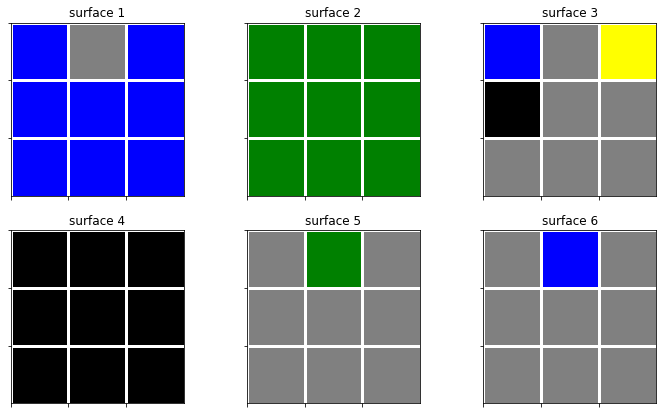

In [118]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(2, 3,figsize=(12,7))
    x = np.linspace(0, 8, 1000)

    ax[0, 0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].axes.xaxis.set_ticklabels([])
    ax[0, 0].axes.yaxis.set_ticklabels([])
    ax[0, 0].set_title('surface 1')

    ax[0, 1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].axes.xaxis.set_ticklabels([])
    ax[0, 1].axes.yaxis.set_ticklabels([])
    ax[0, 1].set_title('surface 2')

    ax[0, 2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].axes.xaxis.set_ticklabels([])
    ax[0, 2].axes.yaxis.set_ticklabels([])
    ax[0, 2].set_title('surface 3')

    ax[1, 0].imshow(data['4'], cmap=cmap, norm=norm)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].axes.xaxis.set_ticklabels([])
    ax[1, 0].axes.yaxis.set_ticklabels([])
    ax[1, 0].set_title('surface 4')

    ax[1, 1].imshow(data['5'], cmap=cmap, norm=norm)
    ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].axes.xaxis.set_ticklabels([])
    ax[1, 1].axes.yaxis.set_ticklabels([])
    ax[1, 1].set_title('surface 5')

    ax[1, 2].imshow(data['6'], cmap=cmap, norm=norm)
    ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].axes.xaxis.set_ticklabels([])
    ax[1, 2].axes.yaxis.set_ticklabels([])
    ax[1, 2].set_title('surface 6')

    fig.show()

x = {'1': np.array([[1, 5, 1],
       [1, 1, 1],
       [1, 1, 1]]), '2': np.array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]]), '3': np.array([[1, 5, 3],
       [4, 6, 6],
       [6, 6, 6]]), '4': np.array([[4, 4, 4],
       [4, 4, 4],
       [4, 4, 4]]), '5': np.array([[5, 2, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': np.array([[6, 1, 6],
       [6, 6, 6],
       [6, 6, 6]])}

show_surface(x)

<ipython-input-121-9239d3861894>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


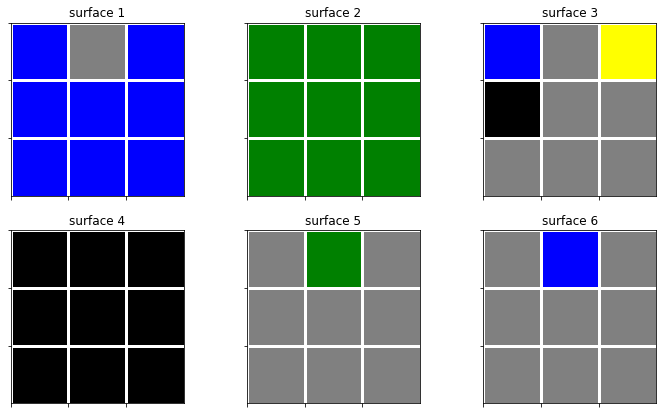

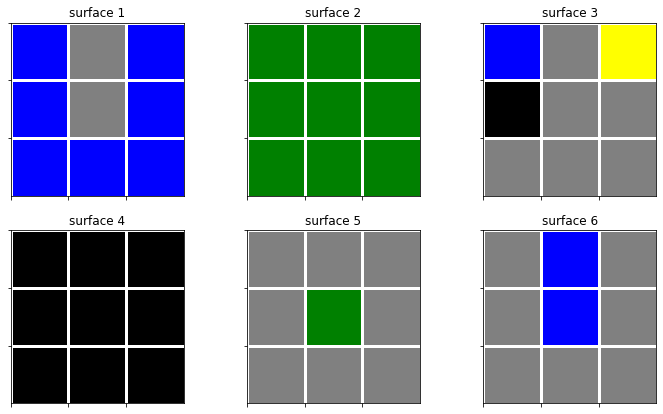

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(2, 3,figsize=(12,7))
    x = np.linspace(0, 8, 1000)

    ax[0, 0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].axes.xaxis.set_ticklabels([])
    ax[0, 0].axes.yaxis.set_ticklabels([])
    ax[0, 0].set_title('surface 1')

    ax[0, 1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].axes.xaxis.set_ticklabels([])
    ax[0, 1].axes.yaxis.set_ticklabels([])
    ax[0, 1].set_title('surface 2')

    ax[0, 2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].axes.xaxis.set_ticklabels([])
    ax[0, 2].axes.yaxis.set_ticklabels([])
    ax[0, 2].set_title('surface 3')

    ax[1, 0].imshow(data['4'], cmap=cmap, norm=norm)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].axes.xaxis.set_ticklabels([])
    ax[1, 0].axes.yaxis.set_ticklabels([])
    ax[1, 0].set_title('surface 4')

    ax[1, 1].imshow(data['5'], cmap=cmap, norm=norm)
    ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].axes.xaxis.set_ticklabels([])
    ax[1, 1].axes.yaxis.set_ticklabels([])
    ax[1, 1].set_title('surface 5')

    ax[1, 2].imshow(data['6'], cmap=cmap, norm=norm)
    ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].axes.xaxis.set_ticklabels([])
    ax[1, 2].axes.yaxis.set_ticklabels([])
    ax[1, 2].set_title('surface 6')

    fig.show()


# def color_surface(x):
#     csurface = []
#     for i in x:
#         m = x[i].reshape(1,9).tolist()[0]
#         z = get_color(m)
#         csurface.append(z)

#     return csurface

# def get_color(a):
#     c = {
#         1 : 'red',
#         2 : 'blue',
#         3 : 'green',
#         4 : 'yellow',
#         5 : 'black',
#         6 : 'gray'    
#     }
#     color_list = []
#     for i in a:
#         color_list.append(c[i])
#     return color_list

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        surface['5'] = counter_clockwise(surface['5'],n)
        
#         return surface
    
    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
        
#         return surface
    
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = clockwise(surface['6'],n)
        
#         return surface
    
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = clockwise(surface['4'],n)
              
#         return surface
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
                      
#         return surface
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['4'] = counter_clockwise(surface['2'],n)
                      
#         return surface
    
    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = b
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
        
#         return surface
    
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = b
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
        
#         return surface
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = b
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = counter_clockwise(surface['3'],n)
        
    return surface
    

surface = {
    '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '3' : np.array([1,2,3,4,5,6,6,6,6]).reshape(3,3),
    '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    '6' : np.array([6,6,6,6,6,6,6,6,6]).reshape(3,3)
}





x = rotate(surface,'y1',1)
show_surface(x)
x = rotate(surface,'y1',1)
show_surface(x)
